In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import utils
from pathlib import Path
from datasets import load_dataset

In [2]:
fig_save_path = Path("figures")
fig_save_path.mkdir(exist_ok=True)

In [3]:
onestop_qa = load_dataset(
    "onestop_qa", split="train", trust_remote_code=True
).to_pandas()

## Percent validation error over 0.3

In [4]:
validation_error = pd.read_csv(config.BASE_PATH / "validation_error.csv")
over_03 = validation_error[["num_over_03", "total_trials"]].sum()

percentage_over_03 = round(over_03["num_over_03"] / over_03["total_trials"] * 100, 1)
percentage_avg_error_over_03 = round(
    (validation_error["avg_avg_val_error"] > 0.3).sum() / 360 * 100, 1
)

print(f"Percentage of Trials Over 0.3 Error: {percentage_over_03}%")
print(f"Percentage of Validation Errors Over 0.3: {percentage_avg_error_over_03}%")

Percentage of Trials Over 0.3 Error: 15.5%
Percentage of Validation Errors Over 0.3: 8.9%


# Statistics

In [5]:
data = utils.load_df(config.FULL_REPORT_PATH)

dat = utils.load_df(
    config.BASE_PATH / "all_dat_files_merged.tsv"
)  # TODO move to config

In [6]:
IA_P = utils.load_df(config.IA_P_PATH)
IA_Q = utils.load_df(config.IA_Q_PATH)
IA_A = utils.load_df(config.IA_A_PATH)
IA_Q_preview = utils.load_df(config.IA_Q_preview_PATH)
IA_T = utils.load_df(config.IA_T_PATH)
TRIAL_P = utils.load_df(config.TRIAL_P_PATH)
TRIAL_QA = utils.load_df(config.TRIAL_QA_PATH)
TRIAL_q_preview = utils.load_df(config.TRIAL_q_preview_PATH)
TRIAL_T = utils.load_df(config.TRIAL_T_PATH)

/Users/ellalion/OneStop-Eye-Movements/src/utils.py:14: DtypeWarning: Columns (126) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(path, encoding="utf-16")


In [7]:
print(f"Total number of participants: {len(data)}")

Total number of participants: 360


In [8]:
unique_articles = dat.drop_duplicates(subset=["batch", "article_id"]).query(
    "practice==0"
)
print(f"Total number of unique articles: {len(unique_articles)}")

Total number of unique articles: 30


In [9]:
unique_paragraphs = dat.drop_duplicates(
    subset=["batch", "article_id", "paragraph_id"]
).query("practice==0")
print(f"Total number of unique paragraphs: {len(unique_paragraphs)}")

Total number of unique paragraphs: 162


In [10]:
print(
    f"Average number of words per paragraph: {round(unique_paragraphs['paragraph'].str.split().str.len().mean(),1)}"
)

Average number of words per paragraph: 108.6


In [11]:
# Calculate the lengths
p = len(IA_P.query("practice==0"))
q = len(IA_Q.query("practice==0"))
a = len(IA_A.query("practice==0"))
q_pre = len(IA_Q_preview.query("practice==0"))
t = len(IA_T.query("practice==0"))
total = p + q + a + t + q_pre

# Consolidated print statement
print(
    f"Number of tokens in IA reports:\np - {p}\nq - {q}\na - {a}\nq_pre - {q_pre}\nt - {t}\ntotal - {total}"
)

Number of tokens in IA reports:
p - 2252443
q - 201044
a - 868682
q_pre - 101369
t - 30102
total - 3453640


In [12]:
unique_words_ia = IA_P.drop_duplicates(
    subset=["batch", "article_id", "paragraph_id", "level", "IA_ID"]
).query("practice==0")
onsqa_p = onestop_qa.drop_duplicates(subset=["paragraph"]).query("level!=1")
unique_paragraphs_level = dat.drop_duplicates(
    subset=["batch", "article_id", "paragraph_id", "level"]
).query("practice==0")

In [13]:
# Advanced
adv = unique_paragraphs_level[unique_paragraphs_level["level"] == "Adv"]
adv_tokens = [
    word
    for paragraph in utils.get_number_of_tokens(adv, "paragraph")
    for word in paragraph
]
adv_ia = unique_words_ia[unique_words_ia["level"] == "Adv"]
adv_qa = onsqa_p[onsqa_p["level"] == 0]
adv_qa_words = [
    word
    for paragraph in utils.get_number_of_tokens(adv_qa, "paragraph")
    for word in paragraph
]

print(f"DAT Advanced Tokens Count: {len(adv_tokens)}")
print(f"IA Advanced Words Count: {len(adv_ia)}")
print(f"OneStopQA Advanced Words Count: {len(adv_qa_words)}")

DAT Advanced Tokens Count: 19428
IA Advanced Words Count: 19444
OneStopQA Advanced Words Count: 19425


In [14]:
# Elementary
ele = unique_paragraphs_level[unique_paragraphs_level["level"] == "Ele"]
ele_tokens = [
    word
    for paragraph in utils.get_number_of_tokens(ele, "paragraph")
    for word in paragraph
]
ele_ia = unique_words_ia[unique_words_ia["level"] == "Ele"]
ele_qa = onsqa_p[onsqa_p["level"] == 2]
ele_qa_words = [
    word
    for paragraph in utils.get_number_of_tokens(ele_qa, "paragraph")
    for word in paragraph
]

print(f"DAT Elementary Tokens Count: {len(ele_tokens)}")
print(f"IA Elementary Words Count: {len(ele_ia)}")
print(f"OneStopQA Elementary Words Count: {len(ele_qa_words)}")

DAT Elementary Tokens Count: 15737
IA Elementary Words Count: 15744
OneStopQA Elementary Words Count: 15737


# words in OneStop

In [15]:
# Advanced version
adv_sentences = [
    sen
    for paragraph in utils.get_number_of_tokens(adv_qa, "paragraph")
    for sen in paragraph
    if "." in sen
]
print(f"num words: {len(adv_qa_words)}")
# mean paragraph length (words)
print(f"mean paragraph length: {round(len(adv_qa_words) / len(unique_paragraphs),1)}")
# mean sentence length (words)
print(f"mean sentence length: {round(len(adv_qa_words) / len(adv_sentences),1)}")

num words: 19425
mean paragraph length: 119.9
mean sentence length: 20.8


In [16]:
# Elementary version
ele_sentences = [
    sen
    for paragraph in utils.get_number_of_tokens(adv, "paragraph")
    for sen in paragraph
    if "." in sen
]
print(f"num words: {len(ele_qa_words)}")
# mean paragraph length (words)
print(f"mean paragraph length: {round(len(ele_qa_words) / len(unique_paragraphs),1)}")
# mean sentence length (words)
print(f"mean sentence length: {round(len(ele_qa_words) / len(ele_sentences),1)}")

num words: 15737
mean paragraph length: 97.1
mean sentence length: 16.8


# questions (486)

In [17]:
onsqa_q = onestop_qa.drop_duplicates(subset=["paragraph_index", "question"])
onsqa_q_words = onsqa_q["question"]

unique_questions = dat.drop_duplicates(
    subset=["batch", "article_id", "paragraph_id", "question"]
).query("practice==0")
unique_qs = unique_questions["question"]

print(f"Number of unique questions in OneStopQA: {len(onsqa_q)}")
print(
    f"Average length of questions in OneStopQA: {round(utils.get_average_length(onsqa_q_words),1)}"
)
print(f"Number of unique questions in DAT: {len(unique_questions)}")
print(
    f"Average length of questions in DAT: {round(utils.get_average_length(unique_qs),1)}"
)

Number of unique questions in OneStopQA: 486
Average length of questions in OneStopQA: 9.9
Number of unique questions in DAT: 486
Average length of questions in DAT: 9.9


# Answers (1944)

In [18]:
# number of answers
a = unique_questions["a"].tolist()
b = unique_questions["b"].tolist()
c = unique_questions["c"].tolist()
d = unique_questions["d"].tolist()
unique_answers = a + b + c + d

print(f"Total Unique Answers: {len(unique_answers)}")
print(f"Mean Length of 'a': {round(utils.get_average_length(a),1)}")
print(f"Mean Length of 'b': {round(utils.get_average_length(b),1)}")
print(f"Mean Length of 'c': {round(utils.get_average_length(c),1)}")
print(f"Mean Length of 'd': {round(utils.get_average_length(d),1)}")
print(
    f"Mean Length of All Unique Answers: {round(utils.get_average_length(unique_answers),1)}"
)

Total Unique Answers: 1944
Mean Length of 'a': 7.4
Mean Length of 'b': 7.5
Mean Length of 'c': 7.1
Mean Length of 'd': 7.2
Mean Length of All Unique Answers: 7.3


In [19]:
# mean length of the critical span (a_span)
onsqa_a_span = onsqa_p["a_span"]
total_words_a = []
for a in onsqa_a_span:
    words = a[1] - a[0] + 1
    total_words_a.append(words)
mean_a = sum(total_words_a) / len(total_words_a)
print(f"Mean Length of Critical Span (a_span): {round(mean_a,1)}")
# mean length of the distractor span (d_span)
onsqa_d_span = onsqa_p["d_span"]
total_words_d = []
for d in onsqa_d_span:
    words = d[1] - d[0] + 1
    total_words_d.append(words)
mean_d = sum(total_words_d) / len(total_words_d)
print(f"Mean Length of Distractor Span (d_span): {round(mean_d,1)}")

Mean Length of Critical Span (a_span): 31.6
Mean Length of Distractor Span (d_span): 12.9


# participants recruited from:

In [20]:
technion_ex = ["Aya", "Liz", "Nethanella"]
technion = 0
for ex in data["Experimenter"]:
    if ex in technion_ex:
        technion = technion + 1
mit = len(data["Experimenter"]) - technion
print(f"Participants recruited at MIT: {mit}, Technion: {technion}")

Participants recruited at MIT: 303, Technion: 57


# recalibrations

In [21]:
session_interruptions = data["session_interruptions_(recalibrations)"]
print(f"Mean number of recalibrations: {round(np.mean(session_interruptions),1)}")

Mean number of recalibrations: 6.7


# duration

In [22]:
print(f'mean duration (in minutes) - {round(np.mean(data["session_duration"]),1)}')
print(f'mean total duration (in minutes) - {round(np.mean(data["total_duration"]),1)}')

mean duration (in minutes) - 44.3
mean total duration (in minutes) - 55.7


In [23]:
hunting = data[data["batch_condition"] == "p"]
gathering = data[data["batch_condition"] == "n"]
h_session_duration = hunting["session_duration"]
g_session_duration = gathering["session_duration"]
print(f"mean hunting duration - {round(np.mean(h_session_duration),1)}")
print(f"mean gathering duration - {round(np.mean(g_session_duration),1)}")
h_total_session_duration = hunting["total_duration"]
g_total_session_duration = gathering["total_duration"]
print(f"total mean hunting duration - {round(np.mean(h_total_session_duration),1)}")
print(f"total mean gathering duration - {round(np.mean(g_total_session_duration),1)}")

mean hunting duration - 43.3
mean gathering duration - 45.3
total mean hunting duration - 54.3
total mean gathering duration - 57.1


In [24]:
# paragraph duration
p_duration = utils.duration_report(TRIAL_P)
p_h_duration = p_duration[p_duration["batch_condition"] == "p"]
p_g_duration = p_duration[p_duration["batch_condition"] == "n"]
print(f"p hunting - {round(p_h_duration['IP_DURATION'].mean(),1)}")
print(f"p gathering - {round(p_g_duration['IP_DURATION'].mean(),1)}")
# q&a duration
qa_duration = utils.duration_report(TRIAL_QA)
qa_h_duration = qa_duration[qa_duration["batch_condition"] == "p"]
qa_g_duration = qa_duration[qa_duration["batch_condition"] == "n"]
print(f"qa hunting - {round(qa_h_duration['IP_DURATION'].mean(),1)}")
print(f"qa gathering - {round(qa_g_duration['IP_DURATION'].mean(),1)}")
# q_preview duration
q_duration = utils.duration_report(TRIAL_q_preview)
print(f"q preview - {round(q_duration['IP_DURATION'].mean(),1)}")
merged_h_q = pd.merge(
    qa_h_duration,
    q_duration,
    on="RECORDING_SESSION_LABEL",
    suffixes=("_qa_h", "_pre_q"),
)
merged_h_q["sum_qa_h_duration"] = (
    merged_h_q["IP_DURATION_qa_h"] + merged_h_q["IP_DURATION_pre_q"]
)
print(round(merged_h_q["sum_qa_h_duration"].mean(), 1))
merged_qa_q = pd.merge(
    qa_duration, q_duration, on="RECORDING_SESSION_LABEL", suffixes=("_qa", "_pre_q")
)
merged_qa_q["sum_qa_q_duration"] = (
    merged_qa_q["IP_DURATION_qa"] + merged_qa_q["IP_DURATION_pre_q"]
)
print(f"qa+q_pre - {round(merged_qa_q['sum_qa_q_duration'].mean(),1)}")
t_duration = utils.duration_report(TRIAL_T)
print(f"t - {round(t_duration['IP_DURATION'].mean(),1)}")
merged_t_p = pd.merge(
    t_duration, p_duration, on="RECORDING_SESSION_LABEL", suffixes=("_t", "_p")
)
merged_t_p["sum_t_p_duration"] = (
    merged_t_p["IP_DURATION_t"] + merged_t_p["IP_DURATION_p"]
)
print(round(merged_t_p["sum_t_p_duration"].mean(), 1))
p_t_h_duration = merged_t_p[merged_t_p["batch_condition_p"] == "p"]
p_t_g_duration = merged_t_p[merged_t_p["batch_condition_p"] == "n"]
print(f"p_t hunting - {round(p_t_h_duration['sum_t_p_duration'].mean(),1)}")
print(f"p_t gathering - {round(p_t_g_duration['sum_t_p_duration'].mean(),1)}")

p hunting - 23.1
p gathering - 28.9
qa hunting - 9.6
qa gathering - 10.7
q preview - 1.7
13.1
qa+q_pre - 11.9
t - 0.7
26.8
p_t hunting - 23.8
p_t gathering - 29.7


In [25]:
print(f"p hunting - {round(p_duration['IP_DURATION'].mean(),1)}")
print(f"p hunting - {round(p_duration['IP_DURATION'].mean(),1)}")

p hunting - 26.0
p hunting - 26.0


# prticipants

In [26]:
survey = data[data["age"] != -1]  # TODO doesn't remove any

In [27]:
# gender
gender = survey["gender"]
labels, counts = np.unique(gender, return_counts=True)
print(
    f"{labels[0]} - {counts[0]}, {labels[1]} - {counts[1]}, {labels[2]} - {counts[2]}"
)
# The mean English Age of Acquisition
print(
    f'Mean age of acquisition (AoA) - {round(np.mean(survey["stat_learning_english"]),1)}'
)
# participants have a university affiliation
institutions = survey["institution"]
# print(f"university affiliation - {survey['institution'].value_counts(dropna=False)}")
# print university affiliation by (text includes): mit; Technion; NaN; other
institutions = institutions.str.lower()
mit = institutions.str.contains("mit").sum()
technion = institutions.str.contains("technion").sum()
nan = institutions.isnull().sum()
other = len(institutions) - mit - technion - nan
university_affiliation = {"MIT": mit, "Technion": technion, "Other": other, "Not a Student": nan}
print(
    f"University Affiliation: MIT - {mit}, Technion - {technion}, NaN - {nan}, Other - {other}"
)

female - 238, male - 117, other - 5
Mean age of acquisition (AoA) - 0.4
University Affiliation: MIT - 207, Technion - 21, NaN - 71, Other - 61


In [28]:
print(f'mean age - {round(np.mean(data["age"]),1)}')
print(f'std age - {round(np.std(data["age"]),1)}')

print(
    f"Age mean - {round(survey['age'].mean(), ndigits=1)}, Age std - {round(survey['age'].std(), 1)}"
)

mean age - 22.8
std age - 5.7
Age mean - 22.8, Age std - 5.8


# Language

In [29]:
# balanced bilinguals
# balanced_bilinguals = survey[survey['balanced_bilinguals']]
ba_bi = survey["balanced_bilinguals"].apply(lambda x: isinstance(x, str))
balanced_bilinguals = survey[ba_bi]
for bb in balanced_bilinguals:
    if "Hebrew" in balanced_bilinguals["balanced_bilinguals"]:
        balanced_bilinguals.loc[bb, "balanced_bilinguals"] = "Hebrew"
print(len(balanced_bilinguals))  # TODO is this what we want?

360


# reading comprehension

In [30]:
# reading comprehension accuracy Hunting
comprehension_score = data.groupby(["batch_condition"])[
    "comprehension_score_without_reread"
].mean()
comprehension_hunting = comprehension_score["p"]
# reading comprehension accuracy Gathering
comprehension_gathering = comprehension_score["n"]

# reading comprehension accuracy re-reading Hunting
reread_comprehension_score = data.groupby(["batch_condition"])[
    "comprehension_score_reread"
].mean()
reread_comprehension_hunting = reread_comprehension_score["p"]
# reading comprehension accuracy re-reading Gathering
reread_comprehension_gathering = reread_comprehension_score["n"]


print(
    f"Reading Comprehension Accuracy - Hunting (without reread): {comprehension_hunting.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Gathering (without reread): {comprehension_gathering.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Hunting (with reread): {reread_comprehension_hunting.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Gathering (with reread): {reread_comprehension_gathering.round(1)}"
)

Reading Comprehension Accuracy - Hunting (without reread): 86.9
Reading Comprehension Accuracy - Gathering (without reread): 81.2
Reading Comprehension Accuracy - Hunting (with reread): 90.6
Reading Comprehension Accuracy - Gathering (with reread): 84.2


# Graphs

In [31]:
survey["additional_languages"]

0                         French 
1                             NaN
2                         French 
3                             NaN
4                       Japanese 
                  ...            
355    Hebrew(Modern Ashkenazic) 
356                Spanish Tamil 
357                           NaN
358      Mandarin Spanish French 
359                           NaN
Name: additional_languages, Length: 360, dtype: object

In [32]:
par_dict = {}
additional_languages = survey["additional_languages"]
par_languages = []
speak = []
for l in additional_languages:
    if pd.isna(l):
        l = ""
        speak.append(len(l))
    else:
        l = list(l.split())
        par_languages = par_languages + l
        speak.append(len(l))
lang, counts = np.unique(par_languages, return_counts=True)
language = dict(zip(lang, counts))
num_of_l, c = np.unique(speak, return_counts=True)
num_of_languages = dict(zip(num_of_l, c))
plus_5 = [min(p_5, 5) for p_5 in speak]
num_of_l_5, c_5 = np.unique(plus_5, return_counts=True)
num_of_lang_plus_5 = dict(zip(num_of_l_5, c_5))

/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_419/3448583386.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set(xticklabels=education_labels)
/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_419/3448583386.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set(xticklabels=add_lang_labels)


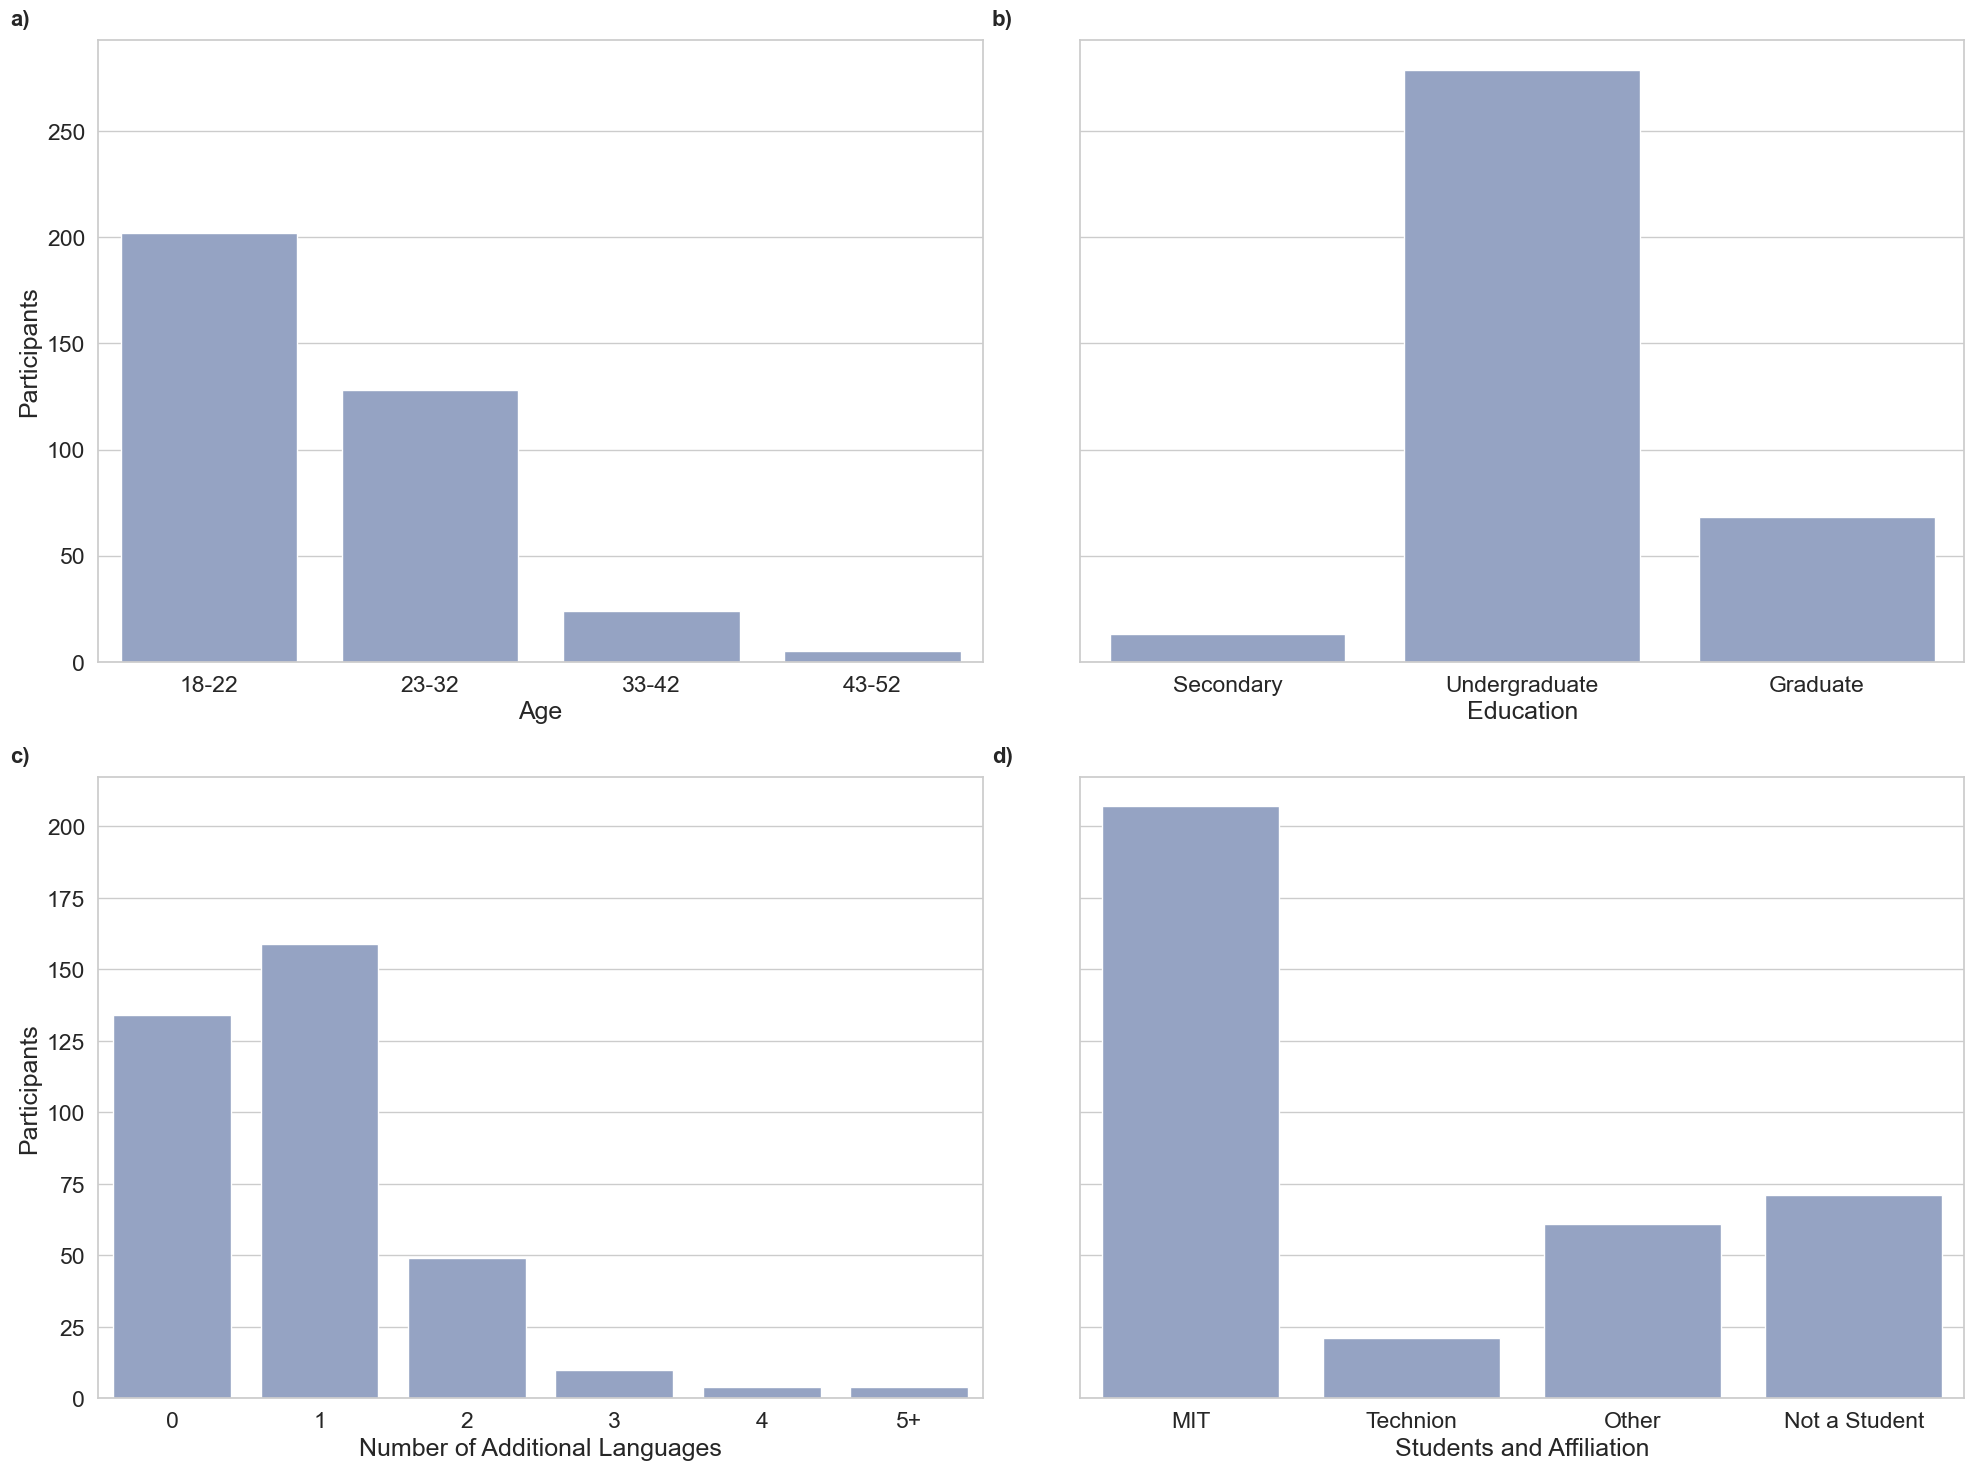

In [33]:
# Create the subplots
sns.set_context("paper", font_scale=2)
sns.set_theme(font_scale=1.5, style="whitegrid")
fig_colors = "#8da0cb"  # "#a1c9f4"

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey="row")

sns.set_style("whitegrid")
# seaborn.set_context("paper", font_scale=2)

# Plot 1: Countplot for Age
age_bins = [18, 22, 32, 42, 52]
age_labels = ["18-22", "23-32", "33-42", "43-52"]
survey = survey.copy()
survey["age_category"] = pd.cut(
    survey["age"], bins=age_bins, labels=age_labels, right=False
)
sns.countplot(
    data=survey, x="age_category", color=fig_colors, ax=axes[0, 0], order=age_labels
)
# axes[0, 0].xaxis.set_major_locator(ticker.MultipleLocator(5))
# axes[0, 0].axvline(x=survey.age.mean(), color='red', linestyle='--', linewidth=2.5)
axes[0, 0].set(ylabel="Participants")
axes[0, 0].set(xlabel="Age")

# Plot 2: Countplot for Education
education_order = ["secondary", "college", "postgrad"]
education_labels = ["Secondary", "Undergraduate", "Graduate"]
sns.countplot(
    data=survey, x="education", color=fig_colors, ax=axes[0, 1], order=education_order
)
axes[0, 1].set(xticklabels=education_labels)
axes[0, 1].set(ylabel="")
axes[0, 1].set(xlabel="Education")

# Plot 3: Barplot for Number of Additional Languages
add_lang_labels = ["0", "1", "2", "3", "4", "5+"]
axes[1, 0] = sns.barplot(
    x=list(num_of_lang_plus_5.keys()),
    y=list(num_of_lang_plus_5.values()),
    color=fig_colors,
    ax=axes[1, 0],
)
axes[1, 0].set(ylabel="Participants")
axes[1, 0].set(xlabel="Number of Additional Languages")
axes[1, 0].set(xticklabels=add_lang_labels)
# axes[1, 0] = seaborn.countplot(x=balanced_bilinguals['balanced_bilinguals'], color='#ff9f9b', ax=axes[1, 0], order=balanced_bilinguals['balanced_bilinguals'].value_counts().index)
# axes[1, 0].set_xlabel("Additional Languages of Balanced Bilinguals")

# Plot 4: Current Students and Affiliation
# university_affiliation_series = pd.Series(university_affiliation)
affiliation_order = ["MIT", "Technion", "Other", "Not a Student"]
sns.barplot(
x=list(university_affiliation.keys()), y=list(university_affiliation.values()), color=fig_colors, ax=axes[1, 1], order=affiliation_order
)

axes[1, 1].set(xlabel="Students and Affiliation")
axes[1, 1].set(ylabel="")

# Add labels (a, b, c, d) to each subplot
axes[0, 0].text(
    -0.1,
    1.05,
    "a)",
    transform=axes[0, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[0, 1].text(
    -0.1,
    1.05,
    "b)",
    transform=axes[0, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 0].text(
    -0.1,
    1.05,
    "c)",
    transform=axes[1, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 1].text(
    -0.1,
    1.05,
    "d)",
    transform=axes[1, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)

# Set facecolor for the figure only horizontal lines
# fig.set_facecolor(color='white')

# Adjust layout
plt.tight_layout()

# Save the plot as pdf
plt.savefig(fig_save_path / "demographics.pdf")

# Show the plot
plt.show()

# calibrations

In [34]:
p_comprehension_score = data[data["batch_condition"] == "p"]
n_comprehension_score = data[data["batch_condition"] == "n"]

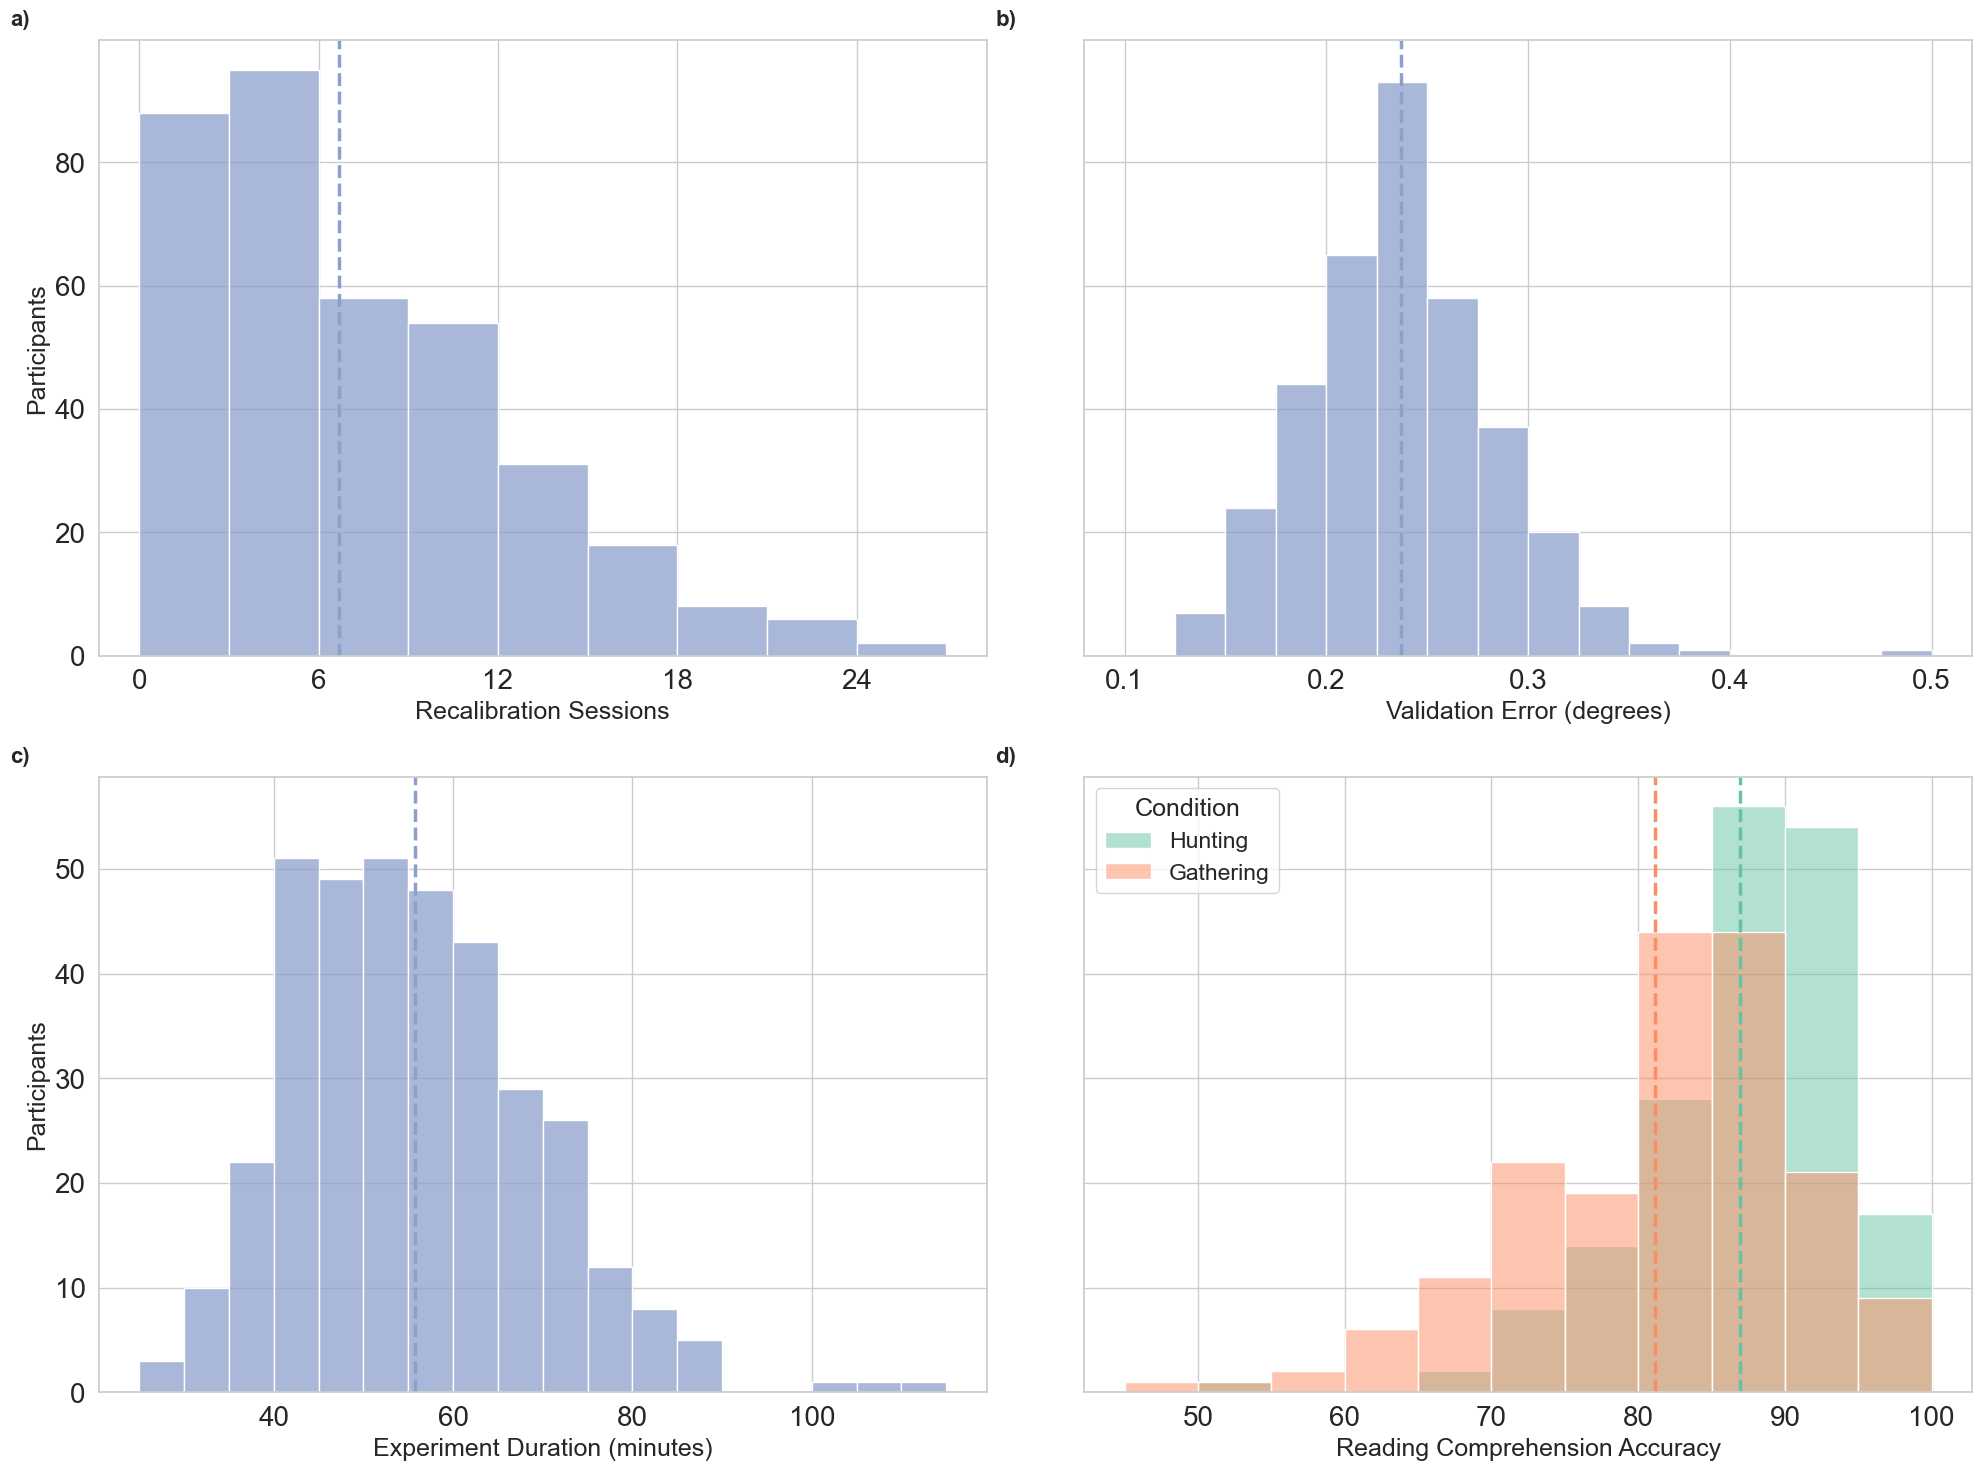

In [35]:
sns.set_context("paper", font_scale=2)
sns.set_theme(font_scale=1.5, style="whitegrid")
# Create the subplots
fig_colors = "#8da0cb"  # "#a1c9f4"
colors = ["#66c2a5", "#fc8d62"]
color_dict = {
    "p": colors[0],
    "n": colors[1],
}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey="row")

# seaborn.set_style(style="whitegrid")

# Plot 1: Number of Recalibrations
axes[0, 0] = sns.histplot(
    data,
    x="session_interruptions_(recalibrations)",
    color=fig_colors,
    ax=axes[0, 0],
    binrange=(0, 27),
    binwidth=3,
)
axes[0, 0].set(ylabel="Participants")
axes[0, 0].set(xlabel="Recalibration Sessions")
axes[0, 0].axvline(session_interruptions.mean(), color=fig_colors, ls="--", lw=2.5)
axes[0, 0].set_xticks(np.arange(0, 28, 6))  # Assuming the x-axis goes from 0 to 27

# Plot 2: Validations
axes[0, 1] = sns.histplot(
    validation_error,
    x="avg_avg_val_error",
    color=fig_colors,
    ax=axes[0, 1],
    binrange=(0.1, 0.5),
    binwidth=0.025,
)
axes[0, 1].set(ylabel="")
axes[0, 1].set(xlabel="Validation Error (degrees)")
axes[0, 1].axvline(
    validation_error.avg_avg_val_error.mean(), color=fig_colors, ls="--", lw=2.5
)
axes[0, 1].set_xticks(np.arange(0.1, 0.51, 0.1))

# Plot 3: Experiment Duration
axes[1, 0] = sns.histplot(
    data,
    x="total_duration",
    color=fig_colors,
    ax=axes[1, 0],
    binrange=(25, 115),
    binwidth=5,
)
# axes[0, 1] = seaborn.histplot(DATA, x="session_duration", color='purple', ax=axes[1])
axes[1, 0].axvline(data.total_duration.mean(), color=fig_colors, ls="--", lw=2.5)
axes[1, 0].set(ylabel="Participants")
axes[1, 0].set(xlabel="Experiment Duration (minutes)")
# axes[0, 1].set_xticks()

# Plot 4: Reading Comprehension Score
condition_labels = [
    "Hunting",
    "Gathering",
]


axes[1, 1] = sns.histplot(
    data=data,
    x="comprehension_score_without_reread",
    palette=color_dict,
    ax=axes[1, 1],
    hue="batch_condition",
    multiple="layer",
    binrange=(45, 100),
    binwidth=5,
)
# bins = np.linspace(40, 100, 25)
# axes[1, 1].hist([p_comprehension_score["comprehension_score_without_reread"], n_comprehension_score["comprehension_score_without_reread"]], bins=bins, color=['#b9f2f0', '#d0bbff'], alpha=0.7, label=['Preview', 'No Preview'])
# handles = [plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor="none") for color in colors]
axes[1, 1].legend(
    # handles=handles,
    labels=condition_labels,
    title="Condition",
    loc="upper left",
)
axes[1, 1].set(xlabel="Reading Comprehension Accuracy")
axes[1, 1].set(ylabel="")
axes[1, 1].axvline(
    data[data["batch_condition"] == "n"].comprehension_score_without_reread.mean(),
    color=colors[1],
    ls="--",
    lw=2.5,
)
axes[1, 1].axvline(
    data[data["batch_condition"] == "p"].comprehension_score_without_reread.mean(),
    color=colors[0],
    ls="--",
    lw=2.5,
)


# Add labels (a, b, c, d) to each subplot
axes[0, 0].text(
    -0.1,
    1.05,
    "a)",
    transform=axes[0, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[0, 1].text(
    -0.1,
    1.05,
    "b)",
    transform=axes[0, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 0].text(
    -0.1,
    1.05,
    "c)",
    transform=axes[1, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 1].text(
    -0.1,
    1.05,
    "d)",
    transform=axes[1, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)

# increase font size
for ax in axes.flat:
    ax.tick_params(axis="both", which="major", labelsize=20)

# increase axis font size

# Set facecolor for the figure
fig.set_facecolor("white")

# Adjust layout
plt.tight_layout()

# Save the plot as pdf
plt.savefig(fig_save_path / "exp_stats.pdf")

# Show the plot
plt.show()

In [36]:
mean_calibrations_per_session = sum(data["total_recalibrations"]) / sum(
    data["session_interruptions_(recalibrations)"]
)
print(
    f"Mean number of calibrations per-recalibration session: {round(mean_calibrations_per_session,1)}"
)

Mean number of calibrations per-recalibration session: 1.3
